In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as T
from torchvision.models import vgg16, resnet18
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cuda')

In [ ]:
PATH_TRAIN = '../data/train.pkl'
PATH_TEST = '../data/test.pkl'
PATH_LABEL = '../data/train_y.csv'

# Load Dataset

In [4]:
images_train = pd.read_pickle(PATH_TRAIN)
images_test = pd.read_pickle(PATH_TEST)
y_train = np.array(pd.read_csv(PATH_LABEL, index_col=0))

# Data visualisation

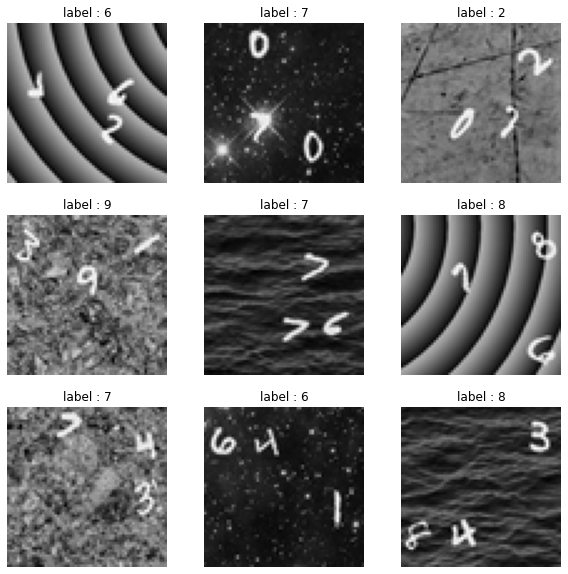

In [5]:
fig, ax = plt.subplots(3,3)
plot_index = [(i, j) for i in range(3) for j in range(3)]
for image, i, label in zip(images_train, plot_index, y_train):
    ax[i].axis('off')
    ax[i].imshow(image, cmap="gray")
    ax[i].set_title(f'label : {label[0]}')

# Encode Data

In [6]:
# One hot encoding 
def to_categorical(y, num_classes):
    return np.eye(num_classes)[y]

# Encode Y to categorical because we have 10 predictions classes
y_train = to_categorical(y_train, 10)

# Data loader

In [7]:
batch_size = 32

In [8]:
from torchvision.io import read_image

class CustomMNIST(Dataset):
    def __init__(self, img_path, csv_path=None, transform=None):
        self.img = pd.read_pickle(img_path)
        if csv_path:
            self.img_labels = pd.read_csv(csv_path, index_col=0)
        self.transform = transform

    def __len__(self):
        return self.img.shape[0]

    def __getitem__(self, idx):
        image = img[idx]
        if self.transform:
            image = self.transform(image)
        sample = image
        if csv_path:
            label = self.img_labels.iloc[idx, 0]
            sample = {"image": image, "label": label}
        return sample

In [9]:
transform = T.Compose([T.ToTensor(), T.Resize((64,64)), T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_set = CustomMNIST('../data/train.pkl', '../data/train_y.csv', transform)

# Crée les dataloader
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size)

NameError: name 'test_set' is not defined

In [12]:
df = pd.read_pickle('../data/train.pkl')
df

array([[[148.28987 , 162.0004  , 183.91206 , ...,  31.710594,
          51.247707,  63.059002],
        [146.8231  , 160.53629 , 178.7513  , ...,  28.804396,
          43.250927,  57.829163],
        [145.15746 , 159.89305 , 174.44496 , ...,  24.18122 ,
          38.264404,  50.954964],
        ...,
        [178.69817 , 170.28003 ,  31.523174, ..., 165.76917 ,
         168.2502  , 178.08884 ],
        [167.75328 , 182.72952 , 151.04893 , ..., 154.51314 ,
         157.69366 , 164.05322 ],
        [162.01456 , 169.22705 , 188.2259  , ..., 136.89764 ,
         143.6989  , 150.6765  ]],

       [[ 49.083   ,  49.996506,  48.29377 , ...,  55.06239 ,
          50.323166,  50.253765],
        [ 47.586403,  48.148506,  48.874912, ...,  50.271217,
          52.50345 ,  51.006023],
        [ 50.178204,  47.237823,  48.907204, ...,  49.97765 ,
          47.93239 ,  48.76915 ],
        ...,
        [ 50.923317,  62.427044,  64.976845, ...,  39.124554,
          38.745644,  40.33352 ],
        [ 50

In [17]:
df.shape[0]

40000